# Logistic Regression in Python for classification.

From a Titanic dataset we will try to predict a classification- survival(1) or deceased(0)

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [83]:
%matplotlib inline

In [84]:
sns.set_style('whitegrid')

In [85]:
train = pd.read_csv('titanic_train.csv')

In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Classes:
    0- not survived
    1- survived

## EDA

Heatmap to see where we are missing data

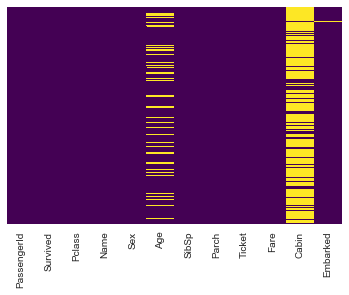

In [87]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

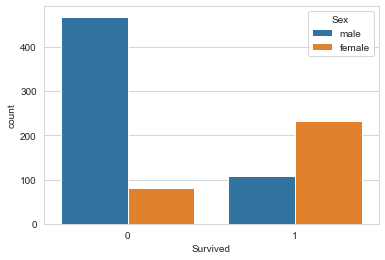

In [88]:
sns.countplot(train['Survived'], hue = train['Sex'])

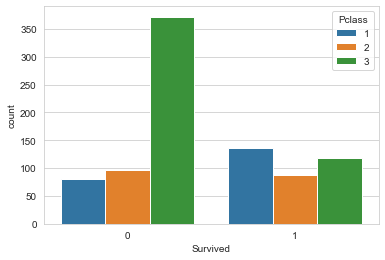

In [89]:
sns.countplot(x='Survived', hue = 'Pclass', data=train)

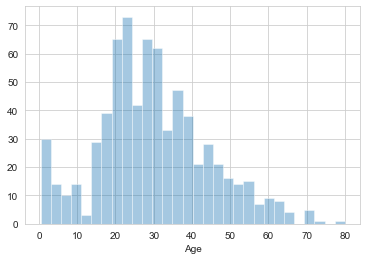

In [90]:
sns.distplot(train['Age'].dropna(), bins=30,kde=False )

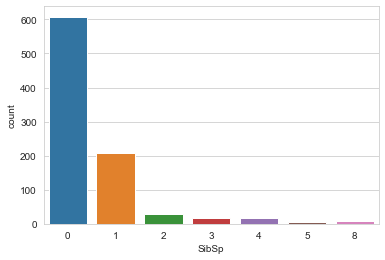

In [91]:
#numbr of siblings and/or spouse
sns.countplot(x='SibSp', data=train)

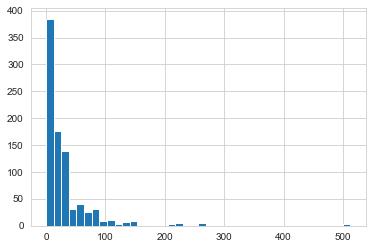

In [92]:
#'Fare' histogram, most passengers bought cheaper tickets
train['Fare'].hist(bins=40)

## Data Cleaning

#### Handling null values: fill out or drop####

Filling in missing 'Age' data instead of just dropping the missing age data rows. 
By filling in the mean age by passenger class

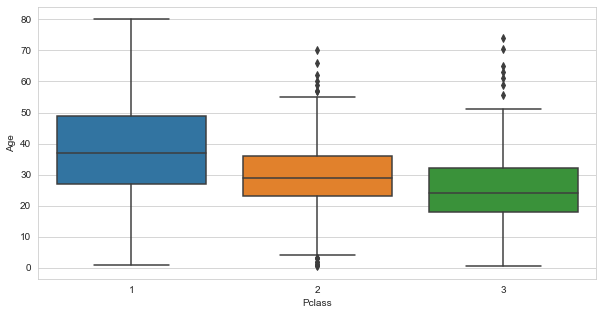

In [93]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass', y='Age', data =train)

Here, wealthier passengers in the higher classes tend to be older, which makes some sense. We will use these average age values to impute based on Pclass for Age.

In [94]:
def impute_class(columns):
    Age=columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 25
    
    else:
        return Age    

In [95]:
train['Age'] = train[['Age','Pclass']].apply(impute_class, axis=1)

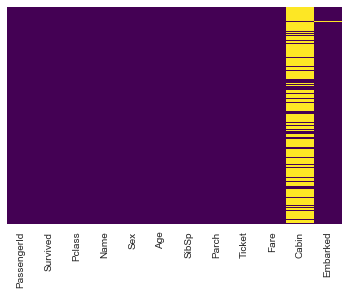

In [96]:
#new heatmap without Age null values
sns.heatmap(train.isnull(), yticklabels= False, cbar=False, cmap='viridis')

Since there are too many missing values in 'Cabin', we drop it. 

In [97]:
train.drop('Cabin', axis=1, inplace=True )

In [98]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


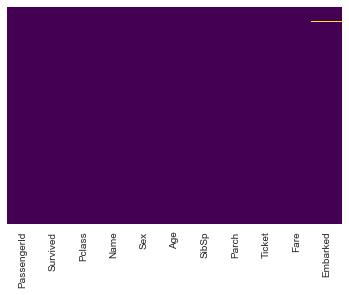

In [99]:
#check heatmap again to see 'Cabin' removed
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [100]:
#Dropping the rest of NAN values 
train.dropna(inplace=True)

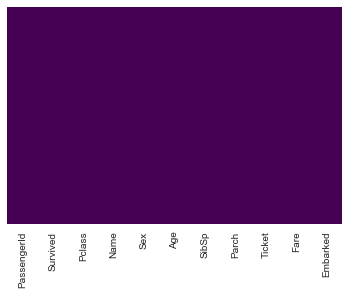

In [101]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Categorical variables-converting them into dummy(indicator) variables ####

In [102]:
#create new dummy variable of sex 
#to avoid multicollinearity we drop one column of male/female
sex = pd.get_dummies(train['Sex'], drop_first= True)

In [103]:
sex.head(3)

,male
0,1
1,0
2,0


In [104]:
#dummy variable of embark
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [105]:
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [106]:
#add new columns to train df
train = pd.concat([train,sex,embark], axis=1)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1


In [107]:
#drop categorical variables that were not converted to dummy 
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace= True)

In [108]:
train.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


Perfect DF for ML algorith, all numerical data & concatenated

Since PassengerId is only and index, we remove it as this column doesn't help to make predictions

In [110]:
train.drop('PassengerId', axis=True, inplace=True)

In [111]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set 
## Train Test Split

In [115]:
#define x & y
y= train['Survived']
X= train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
#split data 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101 )

## Train model

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
#create instance
logmodel = LogisticRegression()

In [120]:
#fit model
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions

In [122]:
predictions = logmodel.predict(X_test)

## Evaluate

In [123]:
from sklearn.metrics import classification_report

In [124]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
confusion_matrix(y_test, predictions)

array([[148,  15],
       [ 36,  68]])